In [ ]:
using Pkg
Pkg.add("Images")
Pkg.add("TestImages")
Pkg.add("ImageIO")
Pkg.add("QuartzImageIO")
Pkg.add("ImageMagick")
Pkg.add("ImageView")

In [21]:
function cbf(n,k,t)
  if k==0
    return 1/sqrt(n)
  else
    return sqrt(2/n)*cos(k*(2t+1)*pi/(2n))
  end
end

function dctcomp(B,l)
  m,n=size(B)
  a=Int(floor(m/8))
  b=Int(floor(n/8))
  
  C=[cbf(8,i,j) for i=0:7, j=0:7]
  
  Mask=[i+j<l for i=1:8, j=1:8]
  
  M=zeros(m,n)
  for i=1:a, j=1:b
    rows=(8i-7):8i
    cols=(8j-7):8j
    X=B[rows,cols]
    Y=C*X*C'
    Y2=Y.*Mask
    X2=C'*Y2*C
    M[rows,cols]=X2
  end
  
    println("Space saved: ", 100(1-sum(Mask)/64), "%")
    println("Average error: ", norm(B-M)/(m*n))
  
  return M
  

  
end


dctcomp (generic function with 1 method)

Space saved: 84.375%
Average error: 0.010954267511216774


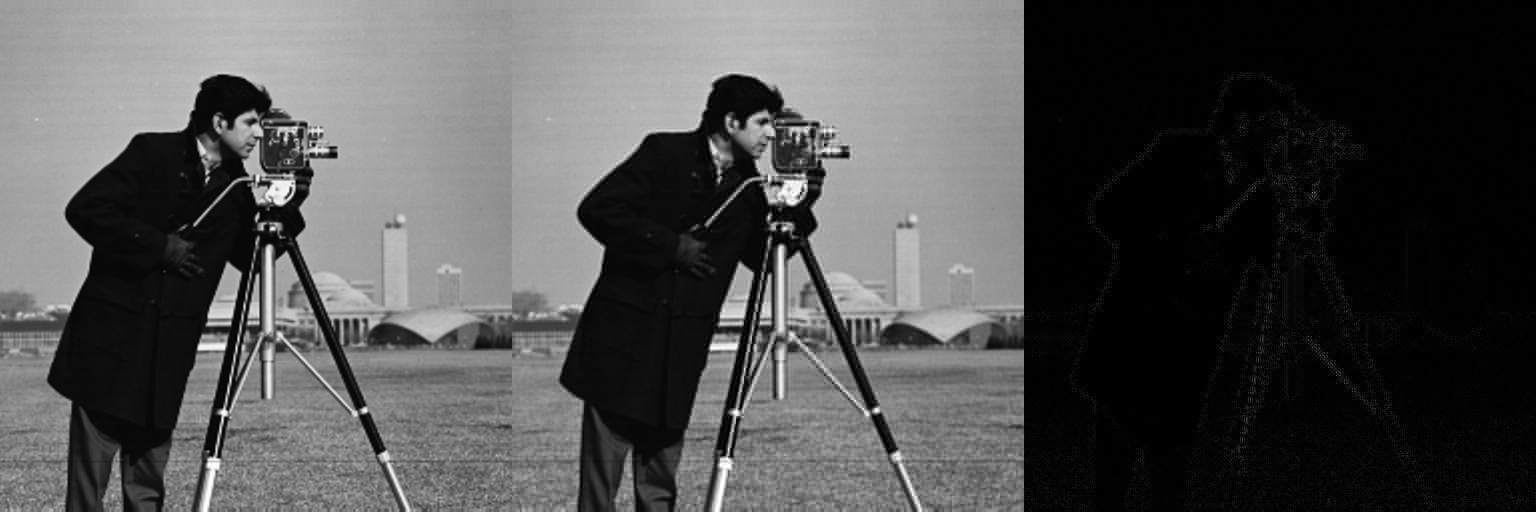

In [25]:
using Images, TestImages, ImageView, LinearAlgebra

img=testimage("cameraman")

A=channelview(img) #image to matrix
n,m=size(A)
O=ones(n,m)

B=255*A-127*O

l=6
C=dctcomp(B,l)
D=(C+127*O)/255

img2=colorview(Gray,D) #matrix to image

E=abs.(A-D) #error matrix
img3=colorview(Gray,E)

mosaicview(img, img2, img3, nrow=1)







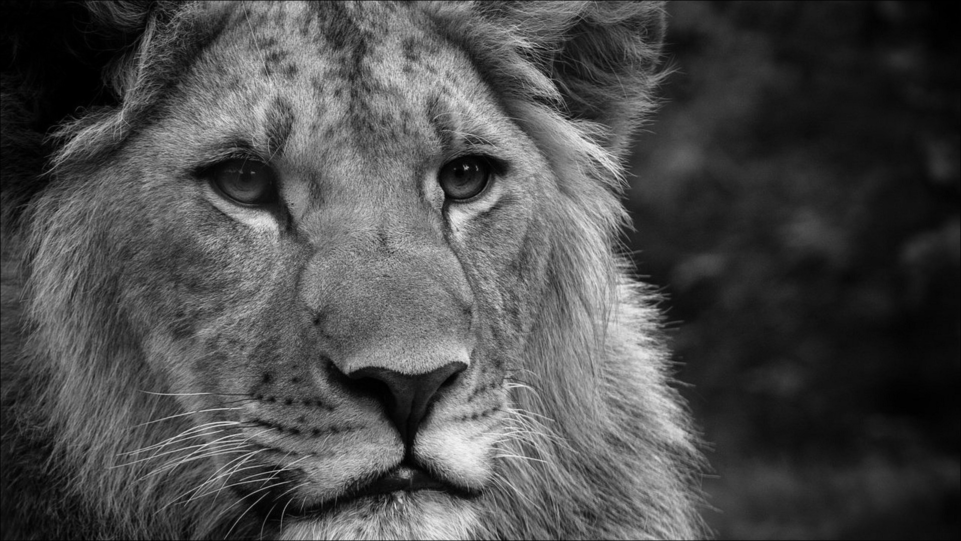

In [26]:
img4=load("lion.jpg")  #if your image is in the same folder as this notebook, you can load it into julia